In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [39]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [14]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [20]:
# preview just to see what kind of data we have
# Find out tablej names from automap_base

In [59]:
data = pd.read_sql("SELECT * FROM measurement", conn)
data.head()
#data["date"].max()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [19]:
data = pd.read_sql("SELECT * FROM station", conn)
data.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [133]:
# pull all data into DataFrame so we can quickly calculate the max date
data = pd.read_sql("SELECT * FROM measurement", conn)
max_date = data["date"].max()

# use dt.datetime.timedelta to calculate the date 1 year previous (i.e. 52 weeks before)
one_year_ago = dt.datetime.strptime(max_date, '%Y-%m-%d')-dt.timedelta(weeks=52)

# convert back into same format this database is using: YYYY-MM-DD
one_year_ago = one_year_ago.strftime("%Y-%m-%d")

# perform query
prcp_1yr = session.query(Measurement).filter(Measurement.date < max_date, Measurement.date > one_year_ago)

# preallocate lists
id_, station, date, prcp = [],[],[],[]

for row in prcp_1yr:
    # store all data in lists - to be combined in dataframe next
    id_.append(row.id)
    station.append(row.station)
    date.append(row.date)
    prcp.append(row.prcp)
    
# create dataframe
last_year_prcp = pd.DataFrame({"ID": id_, "Station": station, "Date": date, "Prcp": prcp}).sort_values(by="Date")
last_year_prcp = last_year_prcp.dropna(how="any").reset_index()
last_year_prcp.head(10)

,index,ID,Station,Date,Prcp
0,0,2366,USC00519397,2016-08-25,0.08
1,1001,8827,USC00517948,2016-08-25,0.00
2,1516,14610,USC00519281,2016-08-25,0.06
3,699,7333,USC00514830,2016-08-25,0.00
4,358,5093,USC00513117,2016-08-25,0.08
5,1866,19204,USC00516128,2016-08-25,0.11
6,1182,11853,USC00519523,2016-08-25,0.21
7,700,7334,USC00514830,2016-08-26,0.02
8,1002,8828,USC00517948,2016-08-26,0.04
9,1,2367,USC00519397,2016-08-26,0.00


Text(0.5, 1.0, 'Precipitation between 2017-08-23 and 2016-08-24')

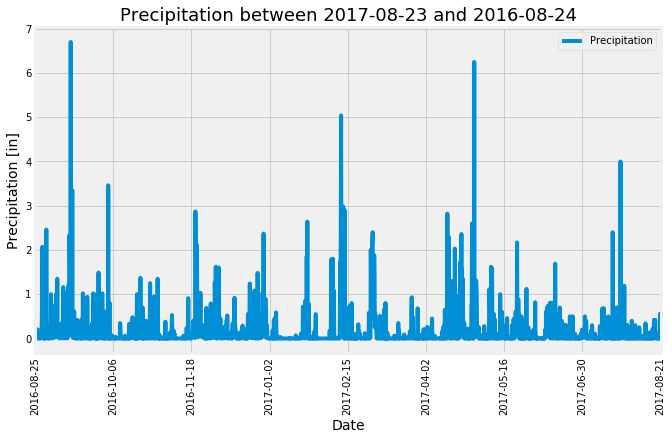

In [160]:
# plot data
last_year_prcp.plot(kind="line", y="Prcp", x="Date", figsize=(10,6),
                    legend=False, fontsize=10,rot=90)

# add x,y labels and title
plt.ylabel("Precipitation [in]",fontsize=14)
plt.xlabel("Date",fontsize=14)
plt.legend(["Precipitation"],loc="best")
plt.title(f"Precipitation between {max_date} and {one_year_ago}", fontsize=18)

In [1]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


![precipitation](Images/precipitation.png)

In [69]:
max_date = data["date"].max()
prcp_1yr = pd.read_sql(f"SELECT * FROM measurement WHERE measurement.date BETWEEN {max_date} AND {one_year_ago}", conn)
prcp_1yr

,id,station,date,prcp,tobs


In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [83]:
prcp_1yr = session.query(Measurement).filter(Measurement.date < data["date"].max(), Measurement.date > one_year_ago).all()
for precip in prcp_1yr:
    print(precip.date)
    print(precip.prcp)

2016-08-25
0.08
2016-08-26
0.0
2016-08-27
0.0
2016-08-28
0.01
2016-08-29
0.0
2016-08-30
0.0
2016-08-31
0.13
2016-09-01
0.0
2016-09-02
0.0
2016-09-03
0.0
2016-09-04
0.03
2016-09-05
None
2016-09-06
None
2016-09-07
0.05
2016-09-08
0.0
2016-09-09
0.03
2016-09-10
0.0
2016-09-11
0.05
2016-09-12
0.0
2016-09-13
0.02
2016-09-14
1.32
2016-09-15
0.42
2016-09-16
0.06
2016-09-17
0.05
2016-09-18
0.0
2016-09-19
0.0
2016-09-20
0.0
2016-09-21
0.0
2016-09-22
0.02
2016-09-23
0.0
2016-09-24
0.0
2016-09-25
0.0
2016-09-26
0.06
2016-09-27
0.02
2016-09-28
0.0
2016-09-29
0.0
2016-09-30
0.0
2016-10-01
0.0
2016-10-02
0.0
2016-10-03
0.0
2016-10-04
0.0
2016-10-05
0.0
2016-10-06
0.0
2016-10-07
0.0
2016-10-08
0.0
2016-10-09
0.0
2016-10-10
0.0
2016-10-11
0.0
2016-10-12
0.0
2016-10-13
0.0
2016-10-14
0.0
2016-10-15
0.0
2016-10-16
0.0
2016-10-17
0.01
2016-10-18
0.0
2016-10-19
0.0
2016-10-20
0.0
2016-10-21
0.05
2016-10-22
0.15
2016-10-23
0.01
2016-10-24
0.0
2016-10-25
0.03
2016-10-26
0.0
2016-10-27
0.0
2016-10-28
0.0
201

2017-08-17
0.0
2017-08-18
0.0
2017-08-19
0.0
2017-08-20
0.01
2017-08-21
0.02
2016-08-25
0.0
2016-08-26
0.04
2016-08-29
None
2016-08-30
0.02
2016-08-31
None
2016-09-01
None
2016-09-02
None
2016-09-08
None
2016-09-09
None
2016-09-12
None
2016-09-13
None
2016-09-14
None
2016-09-15
None
2016-09-16
0.0
2016-09-19
None
2016-09-20
0.0
2016-09-22
0.06
2016-09-23
0.0
2016-09-26
None
2016-09-28
0.0
2016-09-29
0.04
2016-09-30
None
2016-10-03
None
2016-10-04
None
2016-10-05
None
2016-10-06
0.07
2016-10-07
None
2016-10-11
None
2016-10-13
None
2016-10-17
None
2016-10-18
None
2016-10-19
None
2016-10-20
None
2016-10-21
None
2016-10-24
None
2016-10-25
0.4
2016-10-26
0.2
2016-10-27
None
2016-10-28
None
2016-10-31
None
2016-11-04
None
2016-11-07
None
2016-11-09
0.0
2016-11-14
0.02
2016-11-15
None
2016-11-16
None
2016-11-17
None
2016-11-18
None
2016-11-21
None
2016-11-22
None
2016-11-23
None
2016-11-28
None
2016-11-29
None
2016-11-30
None
2016-12-01
None
2016-12-02
None
2016-12-05
None
2016-12-06
None
201

0.47
2017-01-06
0.1
2017-01-07
0.0
2017-01-08
0.03
2017-01-09
0.0
2017-01-10
0.0
2017-01-11
0.0
2017-01-12
0.0
2017-01-13
0.0
2017-01-14
0.0
2017-01-15
0.01
2017-01-16
0.0
2017-01-17
0.0
2017-01-18
0.07
2017-01-19
0.0
2017-01-20
0.0
2017-01-21
0.08
2017-01-22
0.72
2017-01-23
0.85
2017-01-24
1.85
2017-01-25
2.64
2017-01-26
0.1
2017-01-27
0.03
2017-01-28
0.0
2017-01-29
0.55
2017-01-30
0.0
2017-01-31
0.0
2017-02-01
0.0
2017-02-02
0.0
2017-02-04
None
2017-02-05
0.0
2017-02-06
0.0
2017-02-07
1.79
2017-02-08
0.0
2017-02-09
0.0
2017-02-10
0.0
2017-02-11
0.73
2017-02-12
1.83
2017-02-13
0.0
2017-02-14
0.01
2017-02-15
0.07
2017-02-16
0.13
2017-02-18
None
2017-02-19
0.1
2017-02-20
0.0
2017-02-21
0.07
2017-02-22
0.32
2017-02-23
0.0
2017-02-24
0.0
2017-02-25
0.12
2017-02-26
0.0
2017-02-27
0.0
2017-02-28
0.58
2017-03-01
2.0
2017-03-02
0.58
2017-03-03
0.56
2017-03-04
0.0
2017-03-05
0.35
2017-03-06
0.0
2017-03-07
0.0
2017-03-08
0.0
2017-03-09
0.01
2017-03-10
0.0
2017-03-11
0.0
2017-03-13
None
2017-03-

![describe](Images/describe.png)

In [12]:
# Design a query to show how many stations are available in this dataset?


[(9)]

In [13]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


[(54.0, 85.0, 71.66378066378067)]

In [1]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [16]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [17]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


62.0 68.36585365853658 74.0


<IPython.core.display.Javascript object>


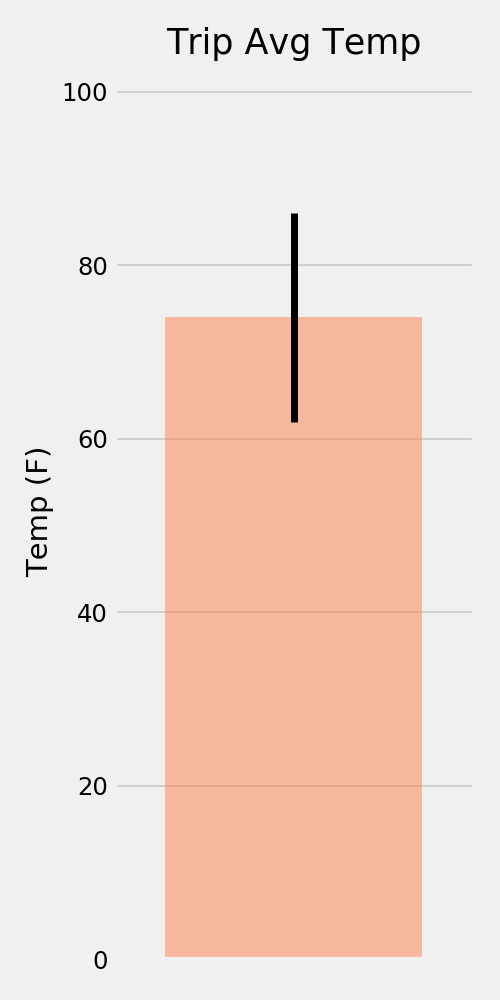

In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [19]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


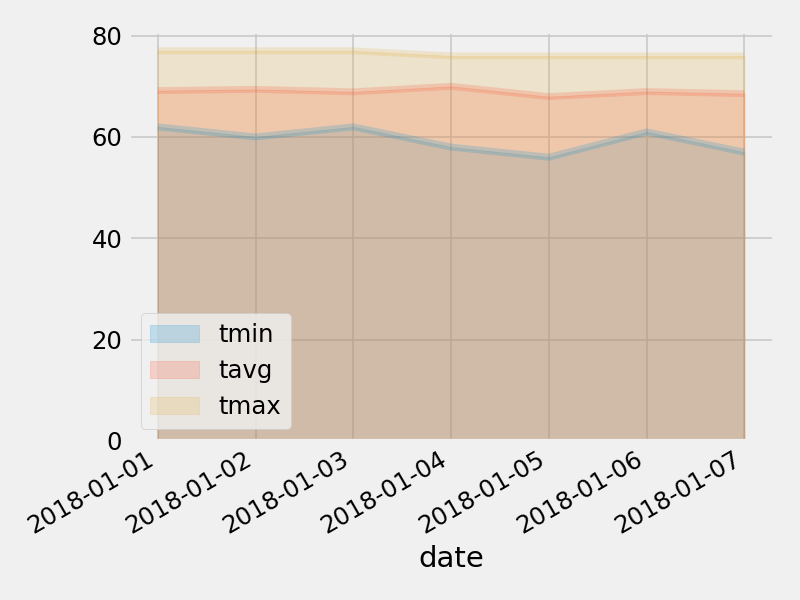

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
